# Analysis Plan

To analyze the `netflix_data` dataset, we will follow these steps:

1. **Data Overview**
    - Display the first few rows of the dataset to understand its structure.
    - Get basic information about the dataset including the number of entries, column names, and data types.
    - Generate summary statistics for numerical columns.

2. **Data Cleaning and Preprocessing**
    - Handle missing values by either filling them with appropriate values or dropping the rows/columns.
    - Convert data types of columns if necessary (e.g., converting `date_added` to datetime).
    - Extract additional features if needed (e.g., extracting the year from `date_added`).

3. **Exploratory Data Analysis (EDA)**
    - Analyze the distribution of categorical variables such as `type`, `country`, `rating`, etc.
    - Visualize the distribution of numerical variables such as `duration`.
    - Explore relationships between different variables (e.g., the relationship between `release_year` and `rating`).

4. **Insights and Conclusions**
    - Summarize the key findings from the EDA.
    - Draw conclusions based on the analysis.
    - Provide recommendations or insights for further investigation.

By following these steps, we will be able to gain a comprehensive understanding of the `netflix_data` dataset and derive meaningful insights from it.

# Data overview

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# read in the netflix csv as Data frame
netflix_df= pd.read_csv(('netflix_titles.csv'))

In [7]:
# Get basic information about the dataset
print("Number of entries:", len(netflix_df))
print("Column names:", netflix_df.columns.tolist())
print("Data types:\n", netflix_df.dtypes)


Number of entries: 8807
Column names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
Data types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


- Column = "Description" 
- show_id = "The ID of the show" (categorical)
- type = "Type of show" (categorical)
- title = "Title of the show" (categorical)
- director = "Director of the show" (categorical)
- cast = "Cast of the show" (categorical)
- country = "Country of origin" (categorical)
- date_added = "Date added to Netflix" (categorical)
- release_year = "Year of Netflix release" (categorical)
- duration = "Duration of the show in minutes" (categorical)
- description = "Description of the show" (categorical)
- genre = "Show genre"  (categorical)

In [9]:
# Basis information about the data
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
# Fill missing values with appropriate values
netflix_df.fillna({
    'director': 'Unknown',  # Replace missing directors with 'Unknown'
    'cast': 'Unknown',      # Replace missing cast with 'Unknown'
    'country': 'Unknown',   # Replace missing country with 'Unknown'
    'date_added': 'Unknown',# Replace missing date_added with 'Unknown'
    'rating': 'Not Rated',  # Replace missing ratings with 'Not Rated'
    'duration': 'Unknown'   # Replace missing duration with 'Unknown'
}, inplace=True)

# Drop rows with missing values in specific columns if necessary
# For example, if you want to drop rows with missing 'title' or 'release_year'
netflix_df.dropna(subset=['title', 'release_year'], inplace=True)

# Verify that there are no more missing values
print(netflix_df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# Convert data types of columns if necessary
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract additional features
netflix_df['year_added'] = netflix_df['date_added'].dt.year

2. Univarate Analysis

In [25]:
# Count the number of movies and TV shows
type_counts = netflix_df['type'].value_counts()
print(type_counts)

# Check if the number of movies is greater than the number of TV shows
if type_counts['Movie'] > type_counts['TV Show']:
    print("In this Netflix data, the number of movies is greater than the number of TV shows.")
else:
    print("In this Netflix data, the number of TV shows is greater than or equal to the number of movies.")

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
In this Netflix data, the number of movies is greater than the number of TV shows.


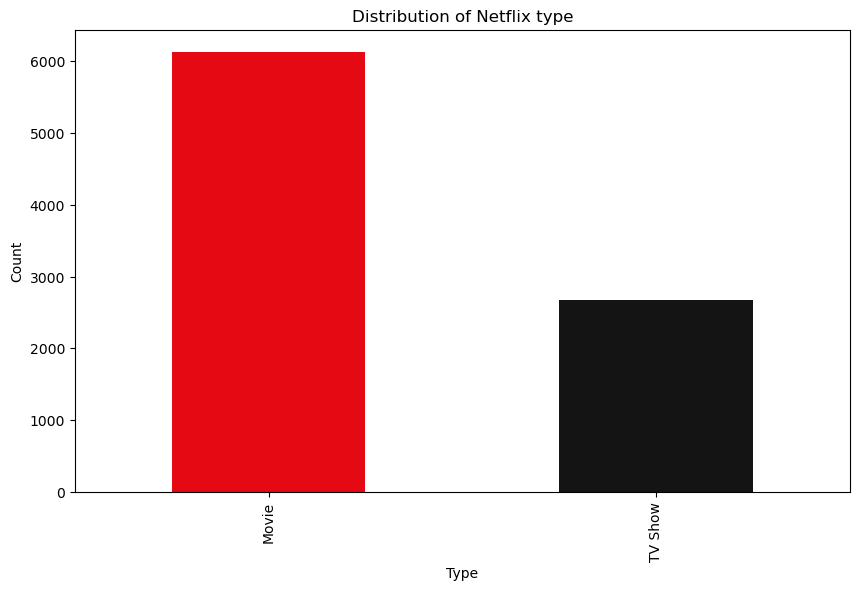

In [23]:
plt.figure(figsize=(10, 6))
netflix_df['type'].value_counts().plot(kind='bar', color=['#E50914', '#141414'])
plt.title('Distribution of Netflix type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [27]:
type_counts = netflix_df['country'].value_counts()
print(len(type_counts))

749


<Axes: xlabel='country'>

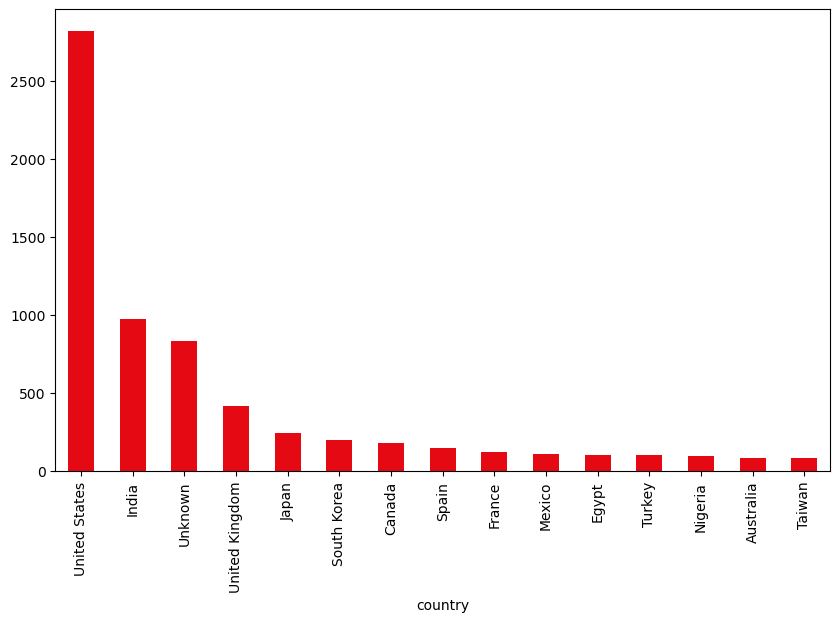

In [28]:
plt.figure(figsize=(10, 6))
type_counts[:15].plot(kind='bar', color='#E50914')
plt.title('Top 15 countries with the most content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [29]:
netflix_df['rating'].value_counts()

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In [ ]:
The values in the `rating` column in the `netflix_df` dataset represent age classifications and content recommendations for movies and TV shows. Here is an explanation of the main values:

- **TV-MA**: Mature content, intended

In [ ]:
# value_counts() of categorical variables
categorical_columns = ['type', 'country', 'rating', 'genre']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    netflix_df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Univariate analysis of numerical variables
numerical_columns = ['release_year', 'year_added']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    netflix_df[column].plot(kind='hist', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()